<a href="https://colab.research.google.com/github/AndresBrie/Tort3D/blob/main/Construir_cadenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

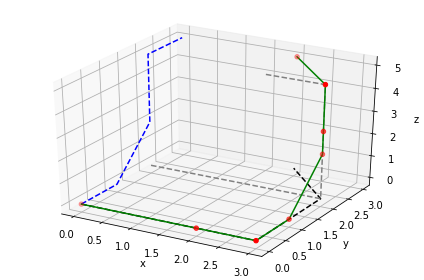

,x,y,z
0,0,0,0
1,2,0,0
2,3,0,0
3,3,1,0
4,3,2,2
5,3,2,3
6,3,2,5
7,2,3,5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def to_dataframe(x,y,z):
  '''
    Easily convert x,y,z coordinates lists to pandas dataframe

    Parameters
    ----------
    x : arraylike
        x coordinate
    y : arraylike
        y coordinate
    z : arraylike
        z coordinate

    Returns
    -------
    df_coords : Pandas dataframe
        Dataframe with x,y,z columns.

    '''
  data=dict({})
  data['x']=x
  data['y']=y
  data['z']=z
  df_coords=pd.DataFrame(data)
  return df_coords

fig = plt.figure()



x=np.array([-2,0,1,1,1,1,1,0])+2
y=[0,0,0,1,2,2,2,3]
z=[0,0,0,0,2,3,5,5]


#x=[0,1,1,2,2,3,4,3]
#y=[0,0,1,1,2,2,2,1]
#z=[0,0,0,0,0,0,0,0]

#x=[0,1,1,2]
#y=[0,0,1,1]
#z=[0,0,0,1]


df_coords=to_dataframe(x,y,z)

ax  = plt.axes(projection ='3d')
ax.plot(x,y,np.zeros_like(x),'--',c='black')
ax.plot(x,np.zeros_like(x)+2,z,'--',c='gray')
ax.plot(np.zeros_like(x),y,z,'--',c='blue')
ax.plot(x,y,z,c='green')
ax.scatter(x,y,z,s=20,c='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()
df_coords

#Reconstruccion (decodificacion)
Dadas las cadenas $\alpha,\beta,l$ para el próximo segmento

**Primeros pasos**
1.   Elegir punto incial $p_1=(0,0,0)$
2.   $p_2=(l_1,0,0)$
3.   Mientras $\alpha_i=0$
  *  $p_{i+1}=p_i+(l_{i+1},0,0)$
4.   $\vec{V}=(l_{i+1}\cos(\alpha_i),l_{i+1}\sin(\alpha_i),0)$
  *  $p_{i+1}=p_i+\vec{V}$
**Parte con ángulos beta**

Tomamos puntos ya reconstruidos $\vec{p_a}$ y $\vec{p_b}, b>a$
  
1. $\vec{V_a}=\vec{p_{a+1}}-\vec{p_a}$ y $\vec{V_b}=\vec{p_{b+1}}-\vec{p_b}$

2. Construir vector (caso sencillo)

  * Caso sencillo ($\vec{V_b}$ coincide con el eje $x$):
    *  construimos el siguiente vector $V_c=(l\cos(\alpha),l\sin(\alpha)\cos(\beta),l\sin(\alpha)\sin(\beta))$
  * Otro caso. Vamos a construir un vector sencillo y rotar los ejes
    * $V_s=(l\cos(\alpha),l\sin(\alpha)\cos(\beta),l\sin(\alpha)\sin(\beta))$
    * Ejes rotados
      * El vector b normalizado es el nuevo eje $\vec{x_r}$. i.e. $\vec{x_r}=\frac{\vec{V_b}}{|\vec{V_b}|}$ 
      * $\vec{z_r}=\frac{\vec{x_r}\times( -\vec{V_a})}{|\vec{x_r}\times\vec{V_a}|}$ (el nuevo eje z es ortogonal a los vectores a y b)
      * $\vec{y_r}=-\vec{x_r}\times \vec{z_r}$ (Eje y ortogonal a xz)
    * Ajustar $\vec{V_s}$ a los nuevos ejes
      * La coordenada $x$ se convierte en $\vec{u}=l\cos(\alpha)\vec{x_r}$
      * La coordenada $y$ se convierte en $\vec{v}=l\sin(\alpha)\cos(\beta)\vec{y_r}$
      * La coordenada $z$ se convierte en $\vec{w}=l\sin(\alpha)\sin(\beta)\vec{z_r}$
      * $\vec{V_c}=\vec{u}+\vec{v}+\vec{w}$

alphas:  [0.         0.5        0.35241638 0.14758362 0.         0.5       ]
betas: [ 0.   -0.5   0.    0.    0.75]
-----
0.35241638234956674 -0.5
1 2 [array([2., 0., 0.]), array([1., 0., 0.]), array([6.123234e-17, 1.000000e+00, 0.000000e+00])]
ejes 1.0 1.0 1.0
5.000000000000001 5.0
-----
0.1475836176504333 0.0
2 3 [array([2., 0., 0.]), array([1., 0., 0.]), array([6.123234e-17, 1.000000e+00, 0.000000e+00]), array([-6.123234e-17,  1.000000e+00,  2.000000e+00])]
ejes 1.0 1.0 1.0
1.0 1.0
-----
0.0 0.0
3 4 [array([2., 0., 0.]), array([1., 0., 0.]), array([6.123234e-17, 1.000000e+00, 0.000000e+00]), array([-6.123234e-17,  1.000000e+00,  2.000000e+00]), array([-6.12323400e-17,  5.55111512e-17,  1.00000000e+00])]
ejes 1.0 1.0 1.0
4.0 4.0
-----
0.5 0.75
3 5 [array([2., 0., 0.]), array([1., 0., 0.]), array([6.123234e-17, 1.000000e+00, 0.000000e+00]), array([-6.123234e-17,  1.000000e+00,  2.000000e+00]), array([-6.12323400e-17,  5.55111512e-17,  1.00000000e+00]), array([-1.22464680e-16,  1.11022

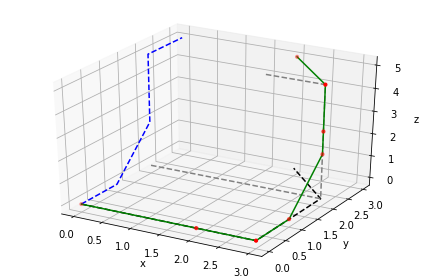

,x,y,z
0,0.0,0.0,0.0
1,2.0,0.0,0.0
2,3.0,0.0,0.0
3,3.0,1.0,0.0
4,3.0,2.0,2.0
5,3.0,2.0,3.0
6,3.0,2.0,5.0
7,2.0,3.0,5.0


In [ ]:
def construct_curve_no_rot(alphas,betas,lengths=None):
  '''
  Construct poligonal curve from chains

  Parameters
  ----------
  alphas: arraylike, size n
    Slope chain

  betas: arraylike, size n-1
    Torsion chain
  
  lengths: arraylike, size n+1
    Segment lengths chain
    
  Returns
  -------
  df_coords : DataFrame
      Pandas DataFrame containing the x,y,z coordinates of the polygonal curves' verteces.
'''
  print('alphas: ',alphas)
  print('betas:',betas)
  alphas=alphas*np.pi
  betas=betas*np.pi
  if lengths is None:
    lengths=np.ones(alphas.shape[0]+1)
  p=[np.array([0,0,0]),np.array([lengths[0],0,0])]#Points
  vec=[np.array([lengths[0],0,0])]# 2 points form 1 vector
  
  a=0
  alpha=alphas[a]
  while a<len(betas) and alpha==0:
    vec_a2=np.zeros(3)
    vec_a2[0]=lengths[a+1]
    vec.append(vec_a2)
    p.append(p[a+1]+vec[a+1])
    
    a+=1
    alpha=alphas[a]
  
  b=a+1
  
  vec.append(lengths[b]*np.array([np.cos(alpha),np.sin(alpha),0]))
  #print(np.cos(alpha)**2+np.sin(alpha)**2)
  p.append(p[b]+vec[b])
  
  for b2 in range(b-1,len(betas)):
    print('-----')
    beta=betas[b2]
    alpha=alphas[b2+1]
    l=lengths[b2+2]
    print(alpha/np.pi,beta/np.pi)

    if alpha==0:
      v_s=np.array([l,0,0])
    elif beta==0:
      v_s=l*np.array([np.cos(alpha),np.sin(alpha),0])
    else:
      u=np.cos(alpha)
      v=np.sin(alpha)*np.cos(beta)
      w=np.sin(alpha)*np.sin(beta)
      v_s=l*np.array([u,v,w])#Vector simple. Generated with resp. to x axis
    
    x_r=vec[b2+1]/np.sqrt(np.sum(vec[b2+1]**2))
    cp1=np.cross(x_r,vec[a])
    z_r=cp1/np.sqrt(np.sum(cp1**2))
    y_r=np.cross(x_r,z_r)
    #print(np.sum(v_s**2)/(l**2),v_s)
    print(a,b2+1,vec)
    print('ejes',np.sum(x_r**2),np.sum(y_r**2),np.sum(z_r**2))

    u=v_s[0]*x_r
    v=v_s[1]*y_r
    w=v_s[2]*z_r
    v_c=u+v+w
    vec.append(v_c)
    
    p.append(p[b2+2]+vec[b2+2])
    print(l**2,np.sum(v_c**2))
    if alpha!=0:
      a=b2+1

  return pd.DataFrame(p,columns=['x','y','z'])

df_rec=construct_curve_no_rot(alphas,betas,lengths)
ax  = plt.axes(projection ='3d')
x1=df_rec['x']
y1=df_rec['y']
z1=df_rec['z']
ax.plot(x1,y1,np.zeros_like(x1),'--',c='black')
ax.plot(x1,np.zeros_like(x1)+2,z1,'--',c='gray')
ax.plot(np.zeros_like(x1),y1,z1,'--',c='blue')
ax.plot(x1,y1,z1,c='green')
ax.scatter(x1,y1,z1,s=10,c='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()
df_rec

# Reconstruction (decoding)
Let $\alpha$ be a slope chain $\alpha_1, \alpha_2,...,\alpha_{n-2}$

Let $\beta$ be a torsion chain $\beta_1, \beta_2,...,\beta_{n-3}$

Let $l$ be a length chain $l_1,l_2,...,l_{n-1}$

The encoded 3D polygonal curve $p_1,p_2,...,p_n$ can be constructed as follows:


1.   Set a starting point $\vec{p_1}=(x_1,y_1,z_1)$ arbitrarily. For example $\vec{p_1}=(0,0,0)$
2.   Set the next point at $\vec{p_2}=(x_1+l_1,y_1,z_1)=(l_1,0,0)$
3. $i=1$, Repeat until $\alpha_i\ne0$ (or $i= n-3$)
  *   Set the next point at $\vec{p_{i+2}}=\vec{p_{i+1}}+(l_{i+1},0,0)$
  * $i+=1$

  


In [ ]:
df_coords

,x,y,z
0,0,0,0
1,2,0,0
2,3,0,0
3,3,1,0
4,3,2,2
5,3,2,3
6,3,2,5
7,2,3,5


dados $\vec{v_a}$ y $\vec{v_b}$

1.   Ajustar $\vec{v_b}$ sobre eje x, Rz

  *   $\theta_z=\arctan(\frac{y_b}{x_b})$
  *   $\vec{v_{b_2}}=$
  *   $\vec{v_{a_2}}=(x_a\cos(\theta_z)+y_a\sin(\theta_z),-x_a\sin(\alpha)+y_a\cos(\alpha),z_a)$


2.   List item

